# Payment Date Prediction 


### Importing related Libraries 

In [304]:
# importing required library

!pip install xgboost

import pandas as pd
import numpy as np 
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import warnings

warnings.filterwarnings('ignore')

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


### Store the dataset into the Dataframe


In [305]:
# reading csv file

data = pd.read_csv(r'dataset.csv')

### Check the shape of the dataframe


In [306]:
# display shape of dataframe

data.shape

(50000, 19)

### Check the Detail information of the dataframe

In [307]:
# display detail info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [308]:
# display dataframe columns

columns_name = []
for col in data.columns:
    columns_name.append(col)
columns_name

['business_code',
 'cust_number',
 'name_customer',
 'clear_date',
 'buisness_year',
 'doc_id',
 'posting_date',
 'document_create_date',
 'document_create_date.1',
 'due_in_date',
 'invoice_currency',
 'document type',
 'posting_id',
 'area_business',
 'total_open_amount',
 'baseline_create_date',
 'cust_payment_terms',
 'invoice_id',
 'isOpen']

### Describe the entire dataset

In [309]:
# describe dataframe

data.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [310]:
# display first 5 from dataframe

data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [311]:
# calculate percentage of null values for each columns

column_null_percentage = dict();
for col in data.columns:
    num = data[col].isnull().sum()
    den = len(data[col])
    ans = float((num / den) * 100) 
    column_null_percentage[col] = ans
column_null_percentage

{'business_code': 0.0,
 'cust_number': 0.0,
 'name_customer': 0.0,
 'clear_date': 20.0,
 'buisness_year': 0.0,
 'doc_id': 0.0,
 'posting_date': 0.0,
 'document_create_date': 0.0,
 'document_create_date.1': 0.0,
 'due_in_date': 0.0,
 'invoice_currency': 0.0,
 'document type': 0.0,
 'posting_id': 0.0,
 'area_business': 100.0,
 'total_open_amount': 0.0,
 'baseline_create_date': 0.0,
 'cust_payment_terms': 0.0,
 'invoice_id': 0.012,
 'isOpen': 0.0}

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [312]:
# display invoice_id and doc_id

print(data["invoice_id"])
print("\n")
print(data["doc_id"])
print("\n")
print("No of equal invoice_id and doc_id:",list(data["invoice_id"] == data["doc_id"]).count(True))

0        1.930438e+09
1        1.929646e+09
2        1.929874e+09
3        2.960623e+09
4        1.930148e+09
             ...     
49995    1.930797e+09
49996    1.929744e+09
49997    1.930537e+09
49998    1.930199e+09
49999    1.928576e+09
Name: invoice_id, Length: 50000, dtype: float64


0        1.930438e+09
1        1.929646e+09
2        1.929874e+09
3        2.960623e+09
4        1.930148e+09
             ...     
49995    1.930797e+09
49996    1.929744e+09
49997    1.930537e+09
49998    1.930199e+09
49999    1.928576e+09
Name: doc_id, Length: 50000, dtype: float64


No of equal invoice_id and doc_id: 49994


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [313]:
# display baseline_create_date, document_create_date and documnent_create_date.1

print(data['baseline_create_date'])
print("\n")
print(data['document_create_date'])
print("\n")
print(data['document_create_date.1'])
print("\n")

similar_val = 0
for i in range(data.shape[0]):
    if(data.loc[i]['baseline_create_date'] == data.loc[i]['document_create_date']):
        if(data.loc[i]['baseline_create_date'] == data.loc[i]['document_create_date.1']):
            similar_val += 1
print("No of equal baseline_create_date, document_create_date and document_create_date.1:",similar_val)

0        20200126.0
1        20190722.0
2        20190914.0
3        20200331.0
4        20191113.0
            ...    
49995    20200421.0
49996    20190815.0
49997    20200219.0
49998    20191127.0
49999    20190101.0
Name: baseline_create_date, Length: 50000, dtype: float64


0        20200125
1        20190722
2        20190914
3        20200330
4        20191113
           ...   
49995    20200417
49996    20190814
49997    20200218
49998    20191126
49999    20190105
Name: document_create_date, Length: 50000, dtype: int64


0        20200126
1        20190722
2        20190914
3        20200330
4        20191113
           ...   
49995    20200421
49996    20190815
49997    20200219
49998    20191127
49999    20190105
Name: document_create_date.1, Length: 50000, dtype: int64


No of equal baseline_create_date, document_create_date and document_create_date.1: 15922


#### Please check, Column 'posting_id' is constant columns or not


In [314]:
# posting_id

data['posting_id'].value_counts()

1.0    50000
Name: posting_id, dtype: int64

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [315]:
# isOpen

data['isOpen'].value_counts()

0    40000
1    10000
Name: isOpen, dtype: int64

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [316]:
# drop particular columns from dataframe

cols = ['area_business', 'posting_id', 'invoice_id', 'document_create_date', 'isOpen', 'document type', 'document_create_date.1']
data.drop(cols,inplace=True,axis=1)

### Please check from the dataframe whether all the columns are removed or not 

In [317]:
# display columns that are present
# cols = ['area_business', 'posting_id', 'invoice_id', 'document_create_date', 'isOpen', 'document type', 'document_create_date.1'] are removed

data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Dublicate rows from the dataframe

In [318]:
# display duplicated rows

duplicate_rows = data[data.duplicated(keep="first")]
duplicate_rows

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


### Display the Number of Dublicate Rows

In [319]:
# calculate no of duplicated rows in dataframe

data.duplicated().sum()

1161

### Drop all the Dublicate Rows

In [320]:
# removed duplicate rows
# keep basically treats the first values as distinct and consider all other values as same or repeated 

data.drop_duplicates(keep='first',inplace=True)

#### Now check for all dublicate rows now

- Note - It must be 0 by now

In [321]:
# calculate duplicated row after drop

data.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [322]:
# display no of rows and columns in dataframe

data.shape

(48839, 12)

### Find out the total count of null values in each columns

In [323]:
# calculate null values in each column of dataframe

data.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

## Data type Conversion 

### Please check the data type of each column of the dataframe

In [324]:
# display datatype of each column in dataframe

data.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [325]:
# datatypes of particular columns

cols = ['clear_date','posting_date','due_in_date','baseline_create_date'];
data[cols].dtypes

clear_date               object
posting_date             object
due_in_date             float64
baseline_create_date    float64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [326]:
# convert the data type of the date column to DateTime

data['clear_date'] = pd.to_datetime(data['clear_date'])
data['posting_date'] = pd.to_datetime(data['posting_date'])
data['due_in_date'] = pd.to_datetime(data['due_in_date'], format='%Y%m%d')
data['baseline_create_date'] = pd.to_datetime(data['baseline_create_date'], format='%Y%m%d')

### Please check the datatype of all the columns after conversion of the above 4 columns

In [327]:
# display datatype of each column in dataframe

data.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [328]:
# counts of invoice_currency (USD AND CAD)

data['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [329]:
# display total_open_amount column of dataframe

data['total_open_amount']

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: total_open_amount, Length: 48839, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [330]:
# conversion

converted_currency = []
for i in range(data.shape[0]):
    if(data.iloc[i]['invoice_currency'] == "CAD"):
        converted_currency.append(data.iloc[i]['total_open_amount'] * 0.7)
    else:
        converted_currency.append(data.iloc[i]['total_open_amount'])
        
data['converted_usd'] = converted_currency

### Display the new "converted_usd" column values

In [331]:
# display new converted_usd column from dataframe

data['converted_usd']

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_usd, Length: 48839, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [332]:
# display year wise no of records according to business_year

data['buisness_year'].value_counts()

2019.0    33975
2020.0    14864
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [333]:
# drop particular columns from dataframe

cols = ['invoice_currency', 'total_open_amount']
data.drop(cols,inplace=True,axis=1)

### Write a code to check the number of columns in dataframe

In [334]:
# check no of columns after drop

data.shape[1]

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [335]:
# columns having null value in dataframe

cols_null = []
for col in data.columns:
    if(data[col].isnull().sum() > 0):
        cols_null.append(col)
cols_null

['clear_date']

#### Find out the number of null values from the column that you got from the above code

In [336]:
# count null values in clear_date

data[cols_null].isnull().sum()

clear_date    9681
dtype: int64

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Not Null data in that column ( This is going to be our test dataset ) 

In [337]:
# maindata is the final data to be used to predict null_data
# nulldata is the final data in which model has to predict

maindata = data[data[cols_null[0]].notnull()].copy()

nulldata = data[data[cols_null[0]].isnull()].copy()

### Check the number of Rows and Columns for both the dataframes 

In [338]:
# no of rows and columns of main_data

print(maindata.shape)

(39158, 11)


In [339]:
# no of rows and columns of null_data

print(nulldata.shape)

(9681, 11)


### Display the 5 records from maindata and nulldata dataframes

In [340]:
# display main_data

maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [341]:
# display null_data

nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [342]:
# Creating delay column

maindata['Delay'] = maindata.loc[:, 'clear_date'] - maindata.loc[:, 'due_in_date']
maindata['Delay']

0        1 days
1       -3 days
2       92 days
4       -3 days
5       61 days
          ...  
49994    0 days
49996    4 days
49997    0 days
49998    0 days
49999   -9 days
Name: Delay, Length: 39158, dtype: timedelta64[ns]

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [343]:
# new column avg_delay to be inserted

avgdelay = maindata.groupby("name_customer")["Delay"].mean(numeric_only=False)
print(avgdelay)

name_customer
11078 us                 17 days 00:00:00
17135 associates       -10 days +00:00:00
17135 llc               -3 days +00:00:00
236008 associates       -3 days +00:00:00
99 CE                     2 days 00:00:00
                              ...        
YEN BROS corp             0 days 00:00:00
YEN BROS corporation    -1 days +12:00:00
YEN BROS llc            -2 days +00:00:00
ZARCO co                -1 days +00:00:00
ZIYAD  us                 6 days 00:00:00
Name: Delay, Length: 3889, dtype: timedelta64[ns]


You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [344]:
# now map the values in main_data
# need to use map function specified

maindata['avg_delay'] = maindata['name_customer'].map(avgdelay)
maindata['avg_delay']

0       -3 days +07:08:49.779837
1               19 days 00:00:00
2         8 days 02:10:54.545454
4       -3 days +19:33:27.692307
5               71 days 10:40:00
                  ...           
49994          -1 days +14:45:00
49996   -3 days +12:40:08.540925
49997     1 days 01:08:34.285714
49998     1 days 13:36:42.985074
49999   -4 days +02:20:52.173913
Name: avg_delay, Length: 39158, dtype: timedelta64[ns]

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [345]:
# change to particular format

maindata['avg_delay'] = maindata['avg_delay'].dt.total_seconds()
print(maindata['avg_delay'])

0       -2.334702e+05
1        1.641600e+06
2        6.990545e+05
4       -1.887923e+05
5        6.172800e+06
             ...     
49994   -3.330000e+04
49996   -2.135915e+05
49997    9.051429e+04
49998    1.354030e+05
49999   -3.371478e+05
Name: avg_delay, Length: 39158, dtype: float64


### Display the maindata dataframe 

In [346]:
# display main_data dataframe

maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-2.334702e+05
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,1.641600e+06
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,6.990545e+05
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-1.887923e+05
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,6.172800e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0 days,-3.330000e+04
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,4 days,-2.135915e+05
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,0 days,9.051429e+04
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days,1.354030e+05


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [347]:
# drop particular columns from dataframe

cols = ["Delay", "clear_date"]
maindata.drop(cols,inplace=True,axis=1)

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [348]:
# Splitting main_data

X = maindata.drop(["avg_delay"], axis=1)

In [349]:
# Splitting main_data

Y = maindata["avg_delay"]

In [350]:
# shape of dataframe

print(X.shape)
print(Y.shape)

(39158, 10)
(39158,)


#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [351]:
# Spliting X and Y dataframe

X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, Y, test_size=0.4, shuffle=True, random_state=1)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [352]:
# shape of X_train, X_loc_test, y_train and y_loc_test

print(X_train.shape, X_loc_test.shape, y_train.shape, y_loc_test.shape)

(23494, 10) (15664, 10) (23494,) (15664,)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [353]:
# Spliting X_loc_test and y_loc_test dataframe

X_val, X_test, y_val, y_test = train_test_split(X_loc_test, y_loc_test, test_size=0.5, shuffle=True, random_state=1)

### Please check for the number of rows and columns of all the 4 dataframes 

In [354]:
# shape of X_val, X_test, y_val and y_test

print(X_val.shape, X_test.shape, y_val.shape, y_test.shape)

(7832, 10) (7832, 10) (7832,) (7832,)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

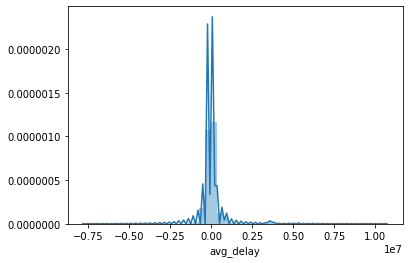

In [355]:
# below graph is right skewed

sns.distplot(y_train)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [356]:
# create a new dataframe

df = X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()
df

,name_customer,doc_id
0,11078 us,1
1,17135 associates,1
2,99 CE,1
3,99 CE co,1
4,99 CE corporation,2
...,...,...
3051,YEN BROS,1
3052,YEN BROS co,1
3053,YEN BROS corp,1
3054,YEN BROS corporation,1


### You can make another distribution plot of the "doc_id" column from x_train

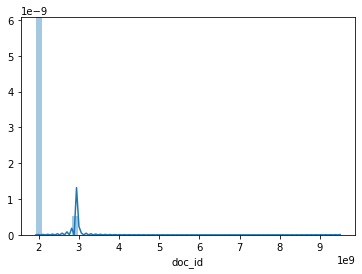

In [357]:
# below graph is doc_id column from X_train

sns.distplot(X_train['doc_id'])

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


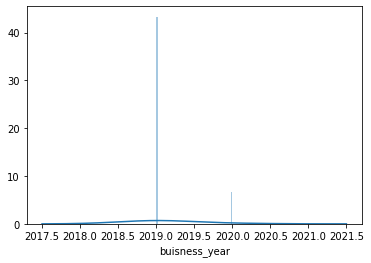

In [358]:
# below graph is buisness_year column from X_train

sns.distplot(X_train['buisness_year'],kde_kws={'bw':0.5})

Text(0, 0.5, 'doc_id')

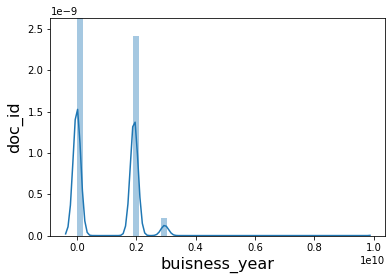

In [359]:
# distplot

sns.distplot([X_train['buisness_year'],X_train['doc_id']])
plt.xlabel('buisness_year', fontsize=16)
plt.ylabel('doc_id', fontsize=16)

# Feature Engineering 

### Display and describe the X_train dataframe 

In [360]:
# display X_train

X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
46683,U001,0200769623,WAL-MAR foundation,2019.0,1.930007e+09,2019-10-13,2019-10-28,2019-10-13,NAH4,38439.450
119,U001,0200772595,SAFEW corporation,2019.0,1.928838e+09,2019-02-21,2019-04-27,2019-02-21,NAGD,2588.650
13099,U001,0200494102,MCCA llc,2019.0,1.929297e+09,2019-05-10,2019-05-26,2019-05-10,C106,48174.000
6451,U001,0200726979,BJ'S corporation,2019.0,1.930248e+09,2019-12-08,2019-12-23,2019-12-08,NAA8,785.990
20492,U001,200759878,SA us,2019.0,1.929093e+09,2019-04-06,2019-04-21,2019-04-06,NAH4,55825.020
...,...,...,...,...,...,...,...,...,...,...
9723,U001,0200769623,WAL-MAR co,2019.0,1.928993e+09,2019-03-20,2019-04-04,2019-03-20,NAH4,56565.370
41318,U001,0200773364,U R M,2019.0,1.929021e+09,2019-03-26,2019-04-10,2019-03-26,NAA8,8710.130
6410,CA02,0140106293,ATLANT corporation,2019.0,2.960528e+09,2019-02-06,2019-02-25,2019-02-15,CA10,9392.642
15221,U001,0200769623,WAL-MAR co,2019.0,1.929908e+09,2019-09-21,2019-10-06,2019-09-21,NAH4,14498.860


In [361]:
# describe X_train

X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.00000,2.349400e+04,23494.000000
mean,2019.13429,2.013695e+09,30658.212426
std,0.34097,2.841794e+08,36383.634560
min,2019.00000,1.928511e+09,0.790000
25%,2019.00000,1.929182e+09,4537.035000
50%,2019.00000,1.929733e+09,16944.880000
75%,2019.00000,1.930212e+09,45446.867500
max,2020.00000,9.500000e+09,668593.360000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [362]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [363]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [364]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [365]:
# display

print(X_train['business_code'],X_train['business_code_enc'])

46683    U001
119      U001
13099    U001
6451     U001
20492    U001
         ... 
9723     U001
41318    U001
6410     CA02
15221    U001
41947    U001
Name: business_code, Length: 23494, dtype: object 46683    1
119      1
13099    1
6451     1
20492    1
        ..
9723     1
41318    1
6410     0
15221    1
41947    1
Name: business_code_enc, Length: 23494, dtype: int32


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [366]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [367]:
X_train , X_val , X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [368]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [369]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [370]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [371]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [372]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [373]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [374]:
# datatype of X_train

X_train.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [375]:
# datatype of X_val

X_val.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [376]:
# datatype of X_test

X_test.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [377]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year

### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [378]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [379]:
# create new features

X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year

X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [380]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [381]:
# create new features

X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year

X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [382]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [383]:
# datatypes of dataframe

print(X_train.dtypes, "\n\n", X_val.dtypes, "\n\n", X_test.dtypes)

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object 

 cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [384]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [385]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [386]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [387]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [388]:
train=X_train.copy()
handling_correlation(train.copy(),0.8)

['day_of_createdate',
 'year_of_postingdate',
 'month_of_createdate',
 'month_of_due',
 'year_of_createdate',
 'year_of_due']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

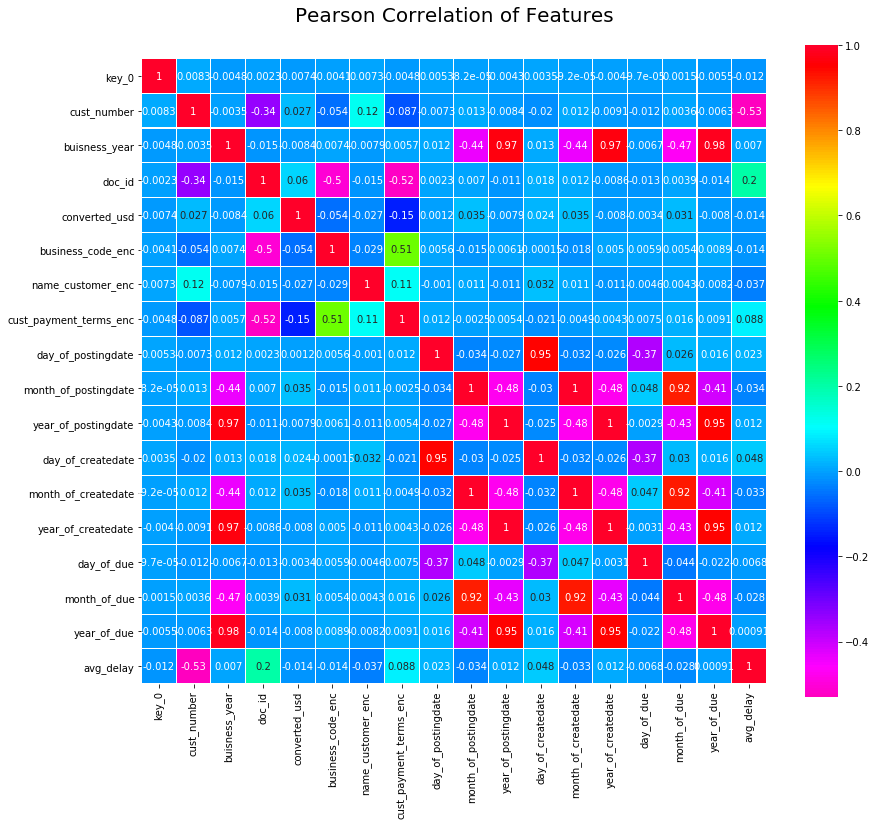

In [389]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [390]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [391]:
sel.variances_

array([1.77833834e+15, 1.16255908e-01, 8.07544916e+16, 1.32371252e+09,
       2.95552036e-01, 1.05154705e+06, 1.42931761e+02, 7.57900109e+01,
       1.22385606e+01, 1.17117448e-01, 7.72866281e+01, 1.22464552e+01,
       1.17244688e-01, 7.62405693e+01, 1.20839720e+01, 1.19220664e-01])

### Important features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [392]:
MSE_Score_test = []
R2_Score_test = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [393]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [394]:
MSE_Score_test.append(mean_squared_error(y_test, predicted, squared=False))
R2_Score_test.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [395]:
predicted_test = regressor.predict(X_val)
mean_squared_error(y_val, predicted_test, squared=False)

536143.9420663618

### Display The Comparison Lists

In [396]:
for i in Algorithm, MSE_Score_test, R2_Score_test:
    print(i,end=',')

['LinearRegression'],[525413.8347120174],[0.3568596683565849],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [397]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regression')
svr = SVR()
svr.fit(X_train, y_train)

predicted_val = svr.predict(X_val)
predicted_test = svr.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [398]:
MSE_Score_test.append(mean_squared_error(y_test, predicted_test, squared=False))
R2_Score_test.append(r2_score(y_test, predicted_test))

### Check the same for the Validation set also 

In [399]:
mean_squared_error(y_val, predicted_val, squared=False)

658884.2150683586

### Display The Comparison Lists

In [400]:
for i in Algorithm, MSE_Score_test, R2_Score_test:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression'],[525413.8347120174, 657169.2988821856],[0.3568596683565849, -0.00613734614922512],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [401]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('Decision Tree Regressor')
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)

predicted_val = decision_tree_regressor.predict(X_val)
predicted_test = decision_tree_regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [402]:
MSE_Score_test.append(mean_squared_error(y_test, predicted_test, squared=False))
R2_Score_test.append(r2_score(y_test, predicted_test))

### Check the same for the Validation set also 

In [403]:
mean_squared_error(y_val, predicted_val, squared=False)

537265.2687588113

### Display The Comparison Lists

In [404]:
for i in Algorithm, MSE_Score_test, R2_Score_test:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor'],[525413.8347120174, 657169.2988821856, 515302.50546957523],[0.3568596683565849, -0.00613734614922512, 0.3813753155411007],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [405]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regressor')
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

predicted_val = random_forest.predict(X_val)
predicted_test = random_forest.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [406]:
MSE_Score_test.append(mean_squared_error(y_test, predicted_test, squared=False))
R2_Score_test.append(r2_score(y_test, predicted_test))

### Check the same for the Validation set also 

In [407]:
mean_squared_error(y_val, predicted_val, squared=False)

350050.6890639226

### Display The Comparison Lists


In [408]:
for i in Algorithm, MSE_Score_test, R2_Score_test:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor', 'Random Forest Regressor'],[525413.8347120174, 657169.2988821856, 515302.50546957523, 313699.2082051279],[0.3568596683565849, -0.00613734614922512, 0.3813753155411007, 0.7707393168404],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [409]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)

predicted_test = regressor.predict(X_test)
predicted_val = regressor.predict(X_val)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [410]:
MSE_Score_test.append(mean_squared_error(y_test, predicted_test, squared=False))
R2_Score_test.append(r2_score(y_test, predicted_test))

### Check the same for the Validation set also 

In [411]:
mean_squared_error(y_val, predicted_val, squared=False)

333529.90768799244

### Display The Comparison Lists


In [412]:
for i in Algorithm, MSE_Score_test, R2_Score_test:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGB Regressor'],[525413.8347120174, 657169.2988821856, 515302.50546957523, 313699.2082051279, 296381.78008743015],[0.3568596683565849, -0.00613734614922512, 0.3813753155411007, 0.7707393168404, 0.7953528309057635],

## You need to make the comparison list into a comparison dataframe 

In [413]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score_test, R2_Score_test)), columns = ['Algorithm', 'MSE_Score_test', 'R2_Score_test'])
Comparison

,Algorithm,MSE_Score_test,R2_Score_test
0,LinearRegression,525413.834712,0.356860
1,Support Vector Regression,657169.298882,-0.006137
2,Decision Tree Regressor,515302.505470,0.381375
3,Random Forest Regressor,313699.208205,0.770739
4,XGB Regressor,296381.780087,0.795353


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [414]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [415]:
mean_squared_error(y_test,predictedfinal,squared=False)

296381.78008743015

### Calculate the mean Square Error for validation dataset

In [416]:
mean_squared_error(y_val,predict_testfinal,squared=False)

333529.90768799244

### Calculate the R2 score for test

In [417]:
r2_score(y_test,predictedfinal)

0.7953528309057635

### Calculate the R2 score for Validation

In [418]:
r2_score(y_val,predict_testfinal)

0.7420576005320135

### Calculate the Accuracy for train Dataset 

In [419]:
from sklearn.metrics import accuracy_score
accuracy_train = regressorfinal.score(X_train,y_train) * 100
accuracy_train

95.34812962840033

### Calculate the accuracy for validation

In [420]:
accuracy_val = regressorfinal.score(X_val,y_val) * 100
accuracy_val

74.20576005320136

### Calculate the accuracy for test

In [421]:
accuracy_test = regressorfinal.score(X_test,y_test) * 100
accuracy_test

79.53528309057634

## Specify the reason behind choosing your machine learning model 

- Note : Model which gives less rmse and more r2_score is chosen as our model.

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [422]:
# display nulldata

nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


### Check for the number of rows and columns in the nulldata

In [423]:
# no of rows and columns

print(nulldata.shape)

(9681, 11)


### Check the Description and Information of the nulldata 

In [424]:
# decribe and info of null_data dataframe

print(nulldata.describe())
print("\n")
print(nulldata.info())

       buisness_year        doc_id  converted_usd
count         9681.0  9.681000e+03    9681.000000
mean          2020.0  2.006165e+09   32065.681125
std              0.0  2.673629e+08   35419.613688
min           2020.0  1.930535e+09       0.720000
25%           2020.0  1.930658e+09    5607.190000
50%           2020.0  1.930731e+09   19024.190000
75%           2020.0  1.930818e+09   47752.640000
max           2020.0  2.960636e+09  653644.800000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   float64       
 5   doc_id                9681 no

### Storing the Nulldata into a different dataset 
# for BACKUP

In [425]:
# store null_data

null_df = nulldata

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [426]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [427]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [428]:
nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [429]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])

### Check for the datatypes of all the columns of Nulldata

In [430]:
# datatypes

print(nulldata.dtypes)

business_code                     object
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [431]:
cols = ["business_code", "baseline_create_date", "due_in_date", "posting_date", "name_customer", "clear_date", "cust_payment_terms", "day_of_cleardate", "month_of_cleardate", "year_of_cleardate"]
nulldata.drop(cols,inplace=True,axis=1)

### Check the information of the "nulldata" dataframe

In [432]:
# info

nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int64  
 5   day_of_due              9681 non-null   int64  
 6   month_of_due            9681 non-null   int64  
 7   year_of_due             9681 non-null   int64  
 8   day_of_createdate       9681 non-null   int64  
 9   month_of_createdate     9681 non-null   int64  
 10  year_of_createdate      9681 non-null   int64  
 11  day_of_postingdate      9681 non-null   int64  
 12  month_of_postingdate    9681 non-null   int64  
 13  year_of_postingdate     9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [433]:
# compare

print(nulldata.info())
print("\n")
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int64  
 5   day_of_due              9681 non-null   int64  
 6   month_of_due            9681 non-null   int64  
 7   year_of_due             9681 non-null   int64  
 8   day_of_createdate       9681 non-null   int64  
 9   month_of_createdate     9681 non-null   int64  
 10  year_of_createdate      9681 non-null   int64  
 11  day_of_postingdate      9681 non-null   int64  
 12  month_of_postingdate    9681 non-null   int64  
 13  year_of_postingdate     9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [434]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [435]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [436]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [437]:
# compare

print(nulldata2.info())
print("\n")
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int64  
 5   name_customer_enc       9681 non-null   int64  
 6   cust_payment_terms_enc  9681 non-null   int64  
 7   day_of_postingdate      9681 non-null   int64  
 8   month_of_postingdate    9681 non-null   int64  
 9   year_of_postingdate     9681 non-null   int64  
 10  day_of_createdate       9681 non-null   int64  
 11  month_of_createdate     9681 non-null   int64  
 12  year_of_createdate      9681 non-null   int64  
 13  day_of_due              9681 non-null   int64  
 14  month_of_due            9681 non-null  

### Now you can pass this dataset into you final model and store it into "final_result"

In [438]:
# nulldata2 to feed to model

final_result = regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [439]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [440]:
# display avg_delay

final_result

0       6.486564e+05
1       3.374096e+05
2       1.082230e+06
3       4.755133e+05
4      -3.003025e+05
            ...     
9676    7.701648e+04
9677    7.836192e+04
9678   -1.291379e+05
9679    2.953922e+05
9680    2.763925e+04
Name: avg_delay, Length: 9681, dtype: float32

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [441]:
# backup dataframe i.e. null_df

null_df.reset_index(drop=True,inplace=True)
Final = null_df.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [442]:
# display

Final

,key_0,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,day_of_due,month_of_due,year_of_due,day_of_createdate,month_of_createdate,year_of_createdate,day_of_postingdate,month_of_postingdate,year_of_postingdate,cust_payment_terms_enc,name_customer_enc,avg_delay
0,0,140105686,2020.0,2.960623e+09,2309.79,67,10,4,2020,31,3,2020,30,3,2020,4,2688,6.486564e+05
1,1,200744019,2020.0,1.930659e+09,11173.02,67,3,4,2020,19,3,2020,19,3,2020,20,2771,3.374096e+05
2,2,200418007,2020.0,1.930611e+09,3525.59,67,26,3,2020,11,3,2020,11,3,2020,20,90,1.082230e+06
3,3,200739534,2020.0,1.930788e+09,121105.65,67,30,4,2020,15,4,2020,15,4,2020,20,2012,4.755133e+05
4,4,200353024,2020.0,1.930817e+09,3726.06,67,26,4,2020,16,4,2020,23,4,2020,36,718,-3.003025e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,9676,200769623,2020.0,1.930625e+09,13114.99,67,25,3,2020,10,3,2020,10,3,2020,34,2965,7.701648e+04
9677,9677,200769623,2020.0,1.930851e+09,8899.71,67,18,5,2020,3,5,2020,3,5,2020,34,2963,7.836192e+04
9678,9678,200148860,2020.0,1.930638e+09,4967.06,67,26,3,2020,11,3,2020,11,3,2020,20,793,-1.291379e+05
9679,9679,200900909,2020.0,1.930702e+09,1998.64,67,9,4,2020,25,3,2020,25,3,2020,20,2737,2.953922e+05


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [443]:
# shape

Final.shape

(9681, 18)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [444]:
import datetime

final_combine_date = []
for i in range(Final.shape[0]):
    combine_date = datetime.datetime(int(Final.loc[i]["year_of_due"]), int(Final.loc[i]["month_of_due"]), int(Final.loc[i]["day_of_due"]))
    final_combine_date.append(combine_date.date())
Final["due_in_date"] = final_combine_date

print(Final["due_in_date"])
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

0       2020-04-10
1       2020-04-03
2       2020-03-26
3       2020-04-30
4       2020-04-26
           ...    
9676    2020-03-25
9677    2020-05-18
9678    2020-03-26
9679    2020-04-09
9680    2020-05-06
Name: due_in_date, Length: 9681, dtype: object


### Display the "clear_date" column

In [445]:
# display clear_date

print(Final["clear_date"])

0      2020-04-17 12:10:56.375000000
1      2020-04-06 21:43:29.593750000
2      2020-04-07 12:37:10.500000000
3      2020-05-05 12:05:13.281250000
4      2020-04-22 12:34:57.531250000
                    ...             
9676   2020-03-25 21:23:36.476562500
9677   2020-05-18 21:46:01.921875000
9678   2020-03-24 12:07:42.125000000
9679   2020-04-12 10:03:12.250000000
9680   2020-05-06 07:40:39.251953125
Name: clear_date, Length: 9681, dtype: datetime64[ns]


### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [446]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [447]:
# display

Final['avg_delay']

0        7.0
1        3.0
2       12.0
3        5.0
4       -4.0
        ... 
9676     0.0
9677     0.0
9678    -2.0
9679     3.0
9680     0.0
Name: avg_delay, Length: 9681, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [448]:
# bucket

bins= [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [449]:
# drop key_0 and avg_delay

cols = ['key_0','avg_delay']
Final.drop(cols,inplace=True,axis=1)

### Display the count of each categoty of new "Aging Bucket" column 

In [450]:
# count

print(Final['Aging Bucket'].value_counts())

0-15               8237
16-30               205
31-45                93
46-60                 9
Greatar than 60       3
Name: Aging Bucket, dtype: int64


### Display your final dataset with aging buckets 

In [451]:
# display

Final

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,day_of_due,month_of_due,year_of_due,day_of_createdate,month_of_createdate,year_of_createdate,day_of_postingdate,month_of_postingdate,year_of_postingdate,cust_payment_terms_enc,name_customer_enc,due_in_date,clear_date,Aging Bucket
0,140105686,2020.0,2.960623e+09,2309.79,67,10,4,2020,31,3,2020,30,3,2020,4,2688,2020-04-10,2020-04-17 12:10:56.375000000,0-15
1,200744019,2020.0,1.930659e+09,11173.02,67,3,4,2020,19,3,2020,19,3,2020,20,2771,2020-04-03,2020-04-06 21:43:29.593750000,0-15
2,200418007,2020.0,1.930611e+09,3525.59,67,26,3,2020,11,3,2020,11,3,2020,20,90,2020-03-26,2020-04-07 12:37:10.500000000,0-15
3,200739534,2020.0,1.930788e+09,121105.65,67,30,4,2020,15,4,2020,15,4,2020,20,2012,2020-04-30,2020-05-05 12:05:13.281250000,0-15
4,200353024,2020.0,1.930817e+09,3726.06,67,26,4,2020,16,4,2020,23,4,2020,36,718,2020-04-26,2020-04-22 12:34:57.531250000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,200769623,2020.0,1.930625e+09,13114.99,67,25,3,2020,10,3,2020,10,3,2020,34,2965,2020-03-25,2020-03-25 21:23:36.476562500,0-15
9677,200769623,2020.0,1.930851e+09,8899.71,67,18,5,2020,3,5,2020,3,5,2020,34,2963,2020-05-18,2020-05-18 21:46:01.921875000,0-15
9678,200148860,2020.0,1.930638e+09,4967.06,67,26,3,2020,11,3,2020,11,3,2020,20,793,2020-03-26,2020-03-24 12:07:42.125000000,NaN
9679,200900909,2020.0,1.930702e+09,1998.64,67,9,4,2020,25,3,2020,25,3,2020,20,2737,2020-04-09,2020-04-12 10:03:12.250000000,0-15


### Store this dataframe into the .csv format

In [452]:
Final.to_csv('final_dataset.csv')

# END OF THE PROJECT

In [453]:
df = pd.read_csv('final_dataset.csv')

In [454]:
df

,Unnamed: 0,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,day_of_due,month_of_due,year_of_due,day_of_createdate,month_of_createdate,year_of_createdate,day_of_postingdate,month_of_postingdate,year_of_postingdate,cust_payment_terms_enc,name_customer_enc,due_in_date,clear_date,Aging Bucket
0,0,140105686,2020.0,2.960623e+09,2309.79,67,10,4,2020,31,3,2020,30,3,2020,4,2688,2020-04-10,2020-04-17 12:10:56.375000000,0-15
1,1,200744019,2020.0,1.930659e+09,11173.02,67,3,4,2020,19,3,2020,19,3,2020,20,2771,2020-04-03,2020-04-06 21:43:29.593750000,0-15
2,2,200418007,2020.0,1.930611e+09,3525.59,67,26,3,2020,11,3,2020,11,3,2020,20,90,2020-03-26,2020-04-07 12:37:10.500000000,0-15
3,3,200739534,2020.0,1.930788e+09,121105.65,67,30,4,2020,15,4,2020,15,4,2020,20,2012,2020-04-30,2020-05-05 12:05:13.281250000,0-15
4,4,200353024,2020.0,1.930817e+09,3726.06,67,26,4,2020,16,4,2020,23,4,2020,36,718,2020-04-26,2020-04-22 12:34:57.531250000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,9676,200769623,2020.0,1.930625e+09,13114.99,67,25,3,2020,10,3,2020,10,3,2020,34,2965,2020-03-25,2020-03-25 21:23:36.476562500,0-15
9677,9677,200769623,2020.0,1.930851e+09,8899.71,67,18,5,2020,3,5,2020,3,5,2020,34,2963,2020-05-18,2020-05-18 21:46:01.921875000,0-15
9678,9678,200148860,2020.0,1.930638e+09,4967.06,67,26,3,2020,11,3,2020,11,3,2020,20,793,2020-03-26,2020-03-24 12:07:42.125000000,NaN
9679,9679,200900909,2020.0,1.930702e+09,1998.64,67,9,4,2020,25,3,2020,25,3,2020,20,2737,2020-04-09,2020-04-12 10:03:12.250000000,0-15
